In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('process_heart.csv')
X=df.drop('target',axis=1)
y=df['target']


#划分训练集和数据集
from sklearn.model_selection import  train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

#构架随机森林模型
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=5,n_estimators=100,random_state=5)
model.fit(X_train,y_train)

#在测试集上预测
y_predict=model.predict(X_test)


Bad key text.latex.preview in file C:\Users\阿超\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\阿超\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\阿超\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is save

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
base_features=df.columns.values.tolist()
base_features.remove('target')
base_features

['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression',
 'num_major_vessels',
 'sex_female',
 'sex_male',
 'chest_pain_type_asymptomatic',
 'chest_pain_type_atypical angina',
 'chest_pain_type_non-anginal pain ',
 'chest_pain_type_typical angina',
 'fasting_blood_sugar_greater than 120mg/ml',
 'fasting_blood_sugar_lower than 120mg/ml',
 'rest_ecg_ST-T wave abnormality',
 'rest_ecg_left ventricular hypertrophy',
 'rest_ecg_normal',
 'exercise_induced_angina_1',
 'exercise_induced_angina_no',
 'st_slope_downsloping',
 'st_slope_flat',
 'st_slope_upsloping',
 'thalassemia_fixed defect',
 'thalassemia_normal',
 'thalassemia_reversable defect',
 'thalassemia_unknow']

# 导入pdpdox工具

In [3]:
from pdpbox import info_plots,get_dataset,pdp,get_dataset,info_plots

pdp图反映了某一特征在不同值变化时对模型预测结果的影响

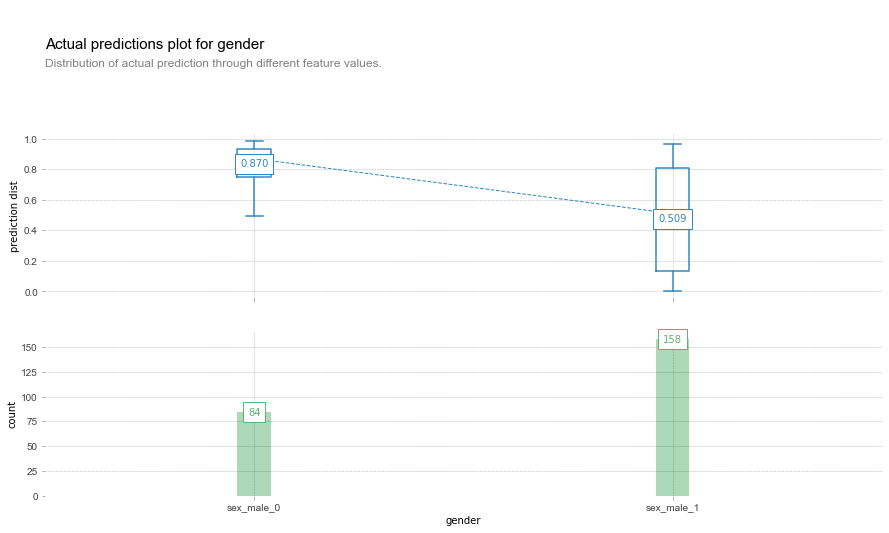

In [5]:
#性别 反应性别从小变到大时 模型预测结果的影响
fig,axex,summary_df=info_plots.actual_plot(
    model=model,X=X_train,feature='sex_male',feature_name='gender',predict_kwds={})

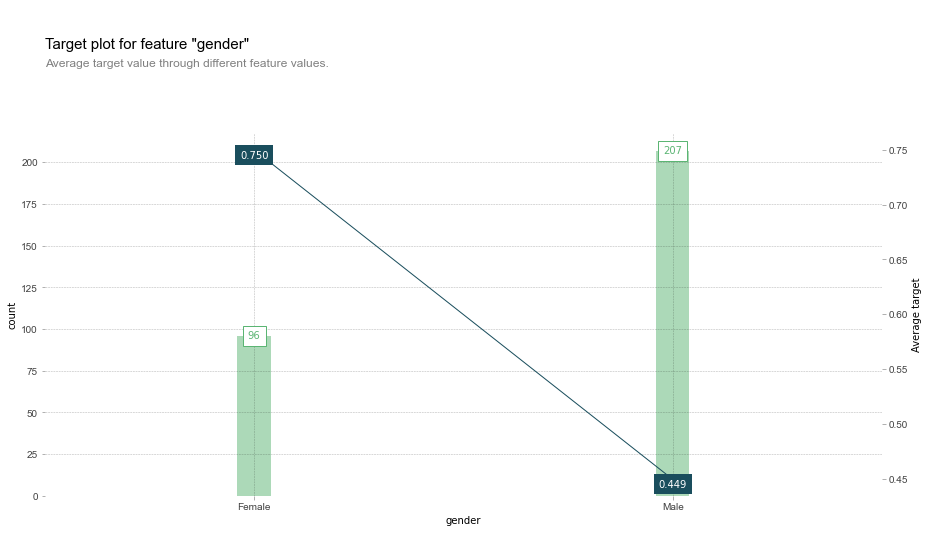

In [10]:
#原始数据集中
fig,axes,summary_df=info_plots.target_plot(
    df=df,feature='sex_male',feature_name='gender',target=['target'])
_=axes['bar_ax'].set_xticklabels(['Female','Male'])

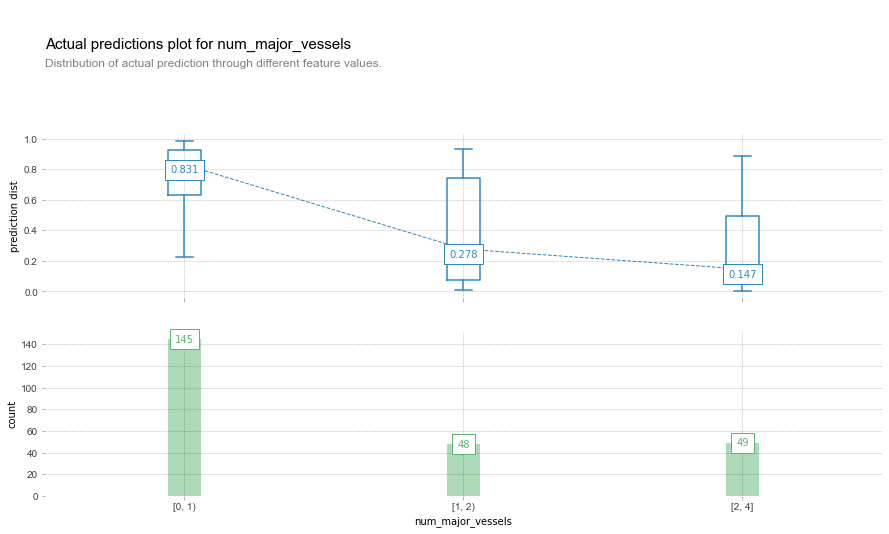

In [11]:
#心脏周围大血管个数反应个数从小变到大时 模型预测结果的影响
fig,axex,summary_df=info_plots.actual_plot(
    model=model,X=X_train,feature='num_major_vessels',feature_name='num_major_vessels',predict_kwds={})

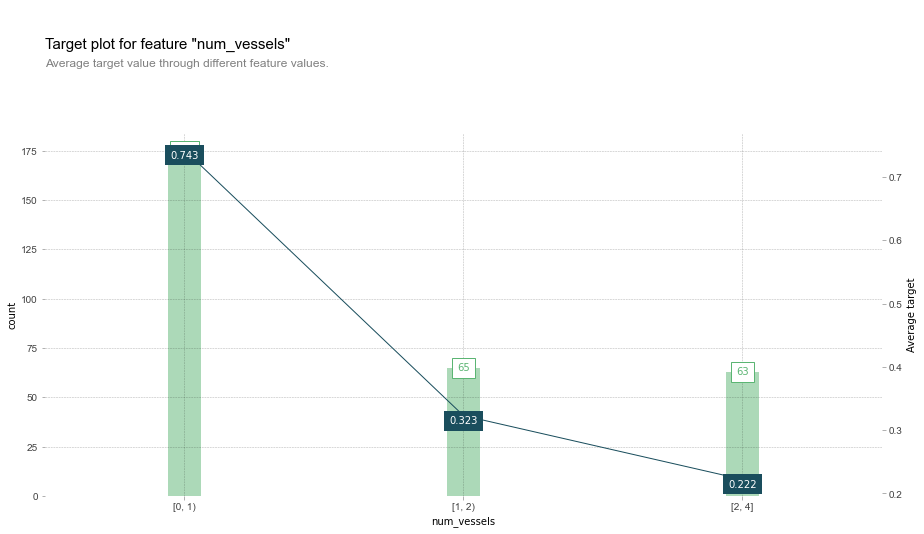

In [12]:
#原始数据集 先验数据不能当作因果性结论
fig,axes,summary_df=info_plots.target_plot(
    df=df,feature='num_major_vessels',feature_name='num_vessels',target=['target'])

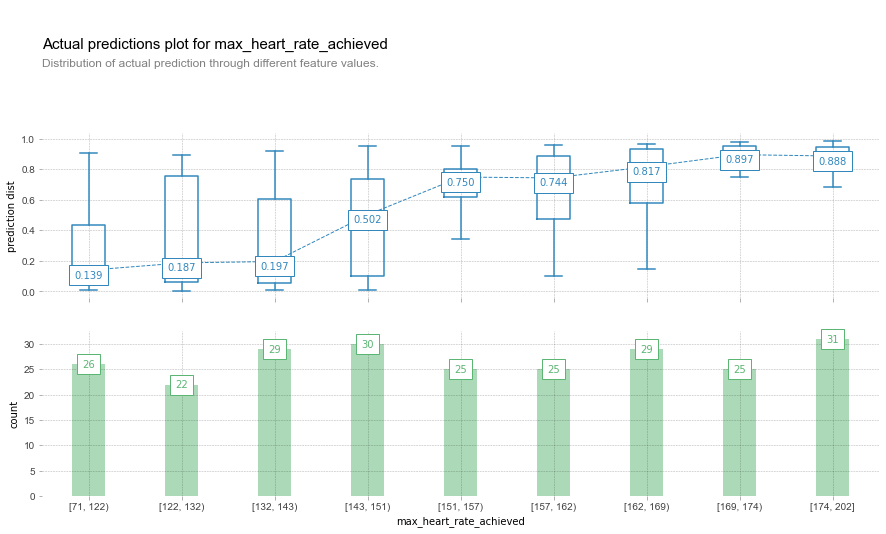

In [13]:
#最大心率
fig,axex,summary_df=info_plots.actual_plot(
    model=model,X=X_train,feature='max_heart_rate_achieved',feature_name='max_heart_rate_achieved',predict_kwds={})

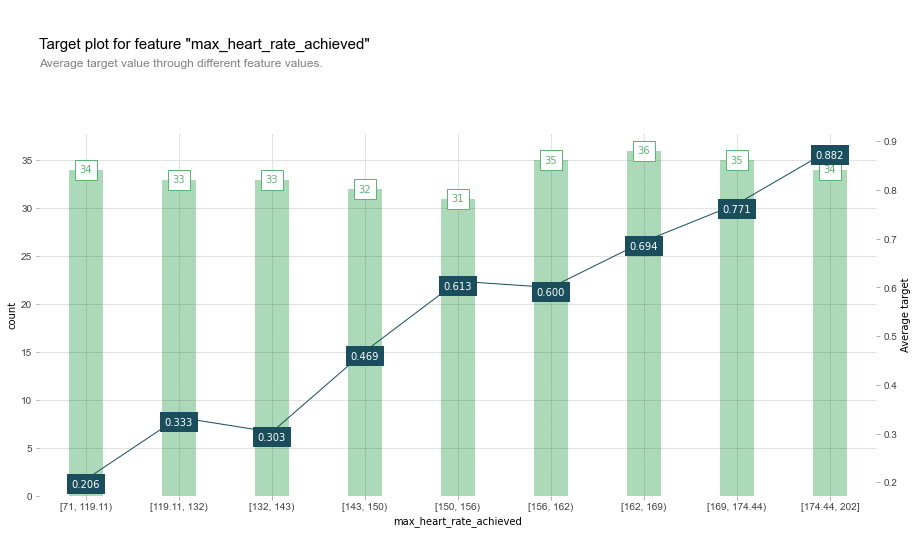

In [14]:
#原始数据集
fig,axes,summary_df=info_plots.target_plot(
    df=df,feature='max_heart_rate_achieved',feature_name='max_heart_rate_achieved',target=['target'])

# ICE 图

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (2).

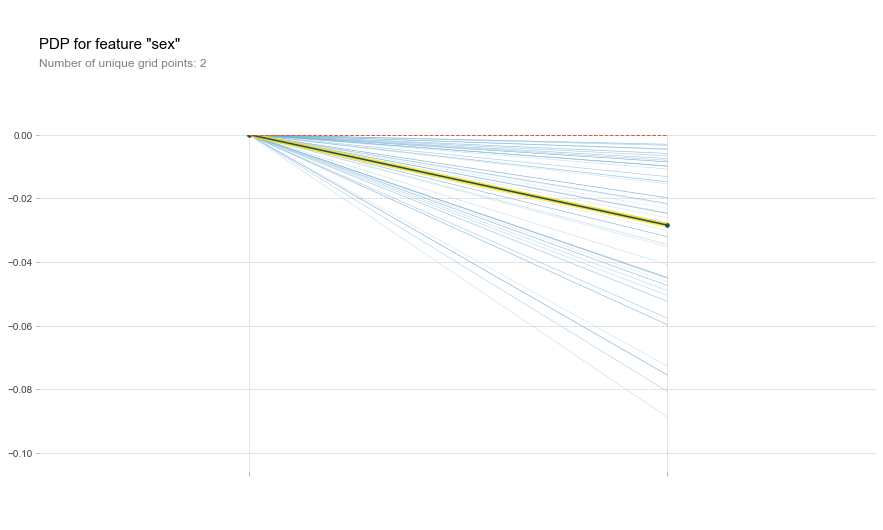

In [41]:
#将测试集的每一个样本的pdp图绘制
feat_name='sex_male'
nick_name='sex'
pdp_dist=pdp.pdp_isolate(
    model=model,dataset=X_test,model_features=base_features,feature=feat_name
)
#more info
fig,axes=pdp.pdp_plot(pdp_dist,nick_name,plot_lines=True,frac_to_plot=0.8,plot_pts_dist=True)

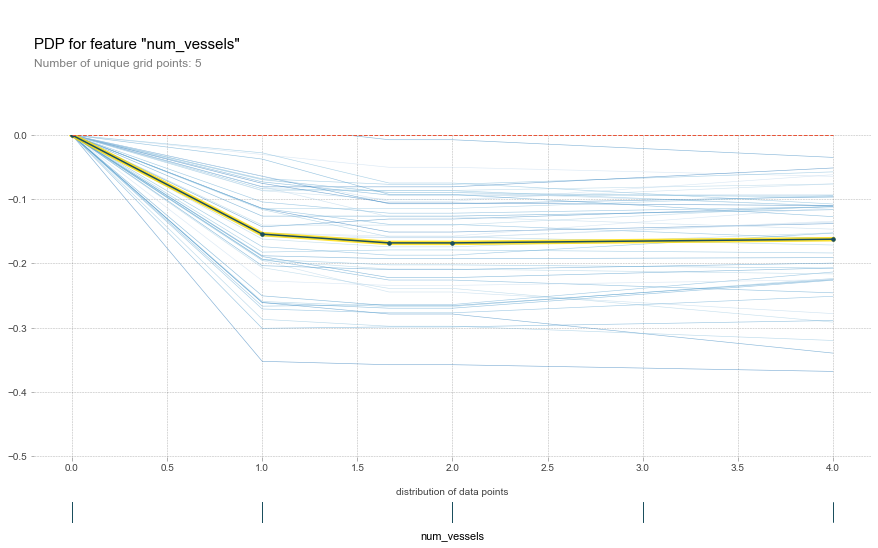

In [23]:
feat_name='num_major_vessels'
nick_name='num_vessels'
pdp_dist=pdp.pdp_isolate(
    model=model,dataset=X_test,model_features=base_features,feature=feat_name
)
#more info
fig,axes=pdp.pdp_plot(pdp_dist, nick_name, plot_lines=True, frac_to_plot=0.8, plot_pts_dist=True)

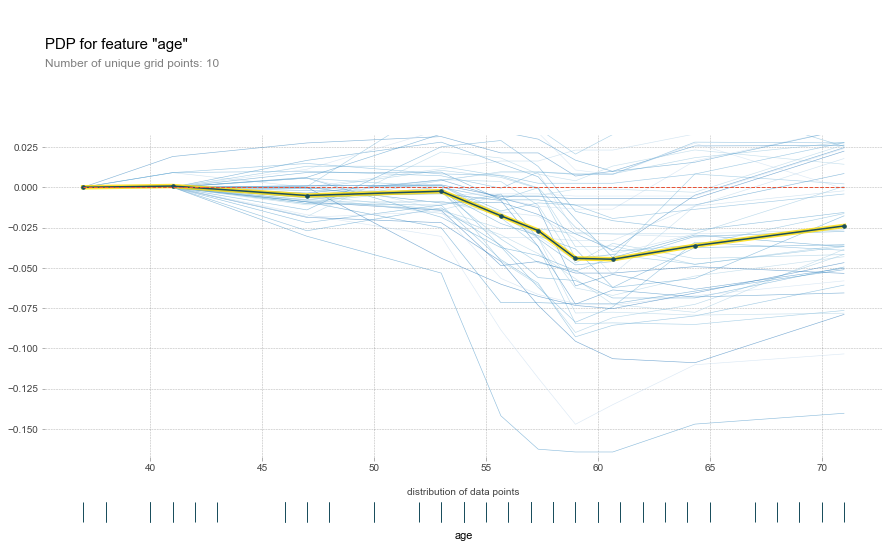

In [26]:
feat_name='age'
nick_name='age'
pdp_dist=pdp.pdp_isolate(
    model=model,dataset=X_test,model_features=base_features,feature=feat_name
)
#more info
fig,axes=pdp.pdp_plot(pdp_dist, nick_name, plot_lines=True, frac_to_plot=0.8, plot_pts_dist=True)

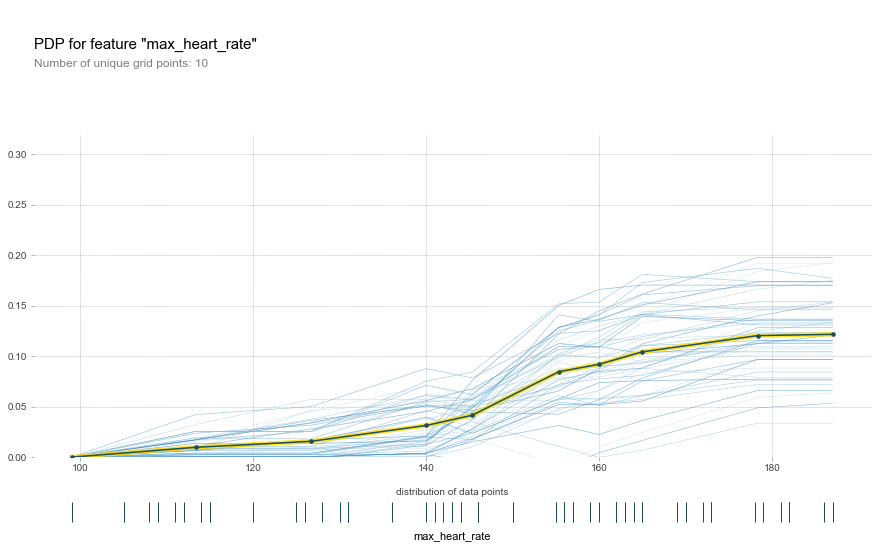

In [34]:
feat_name='max_heart_rate_achieved'
nick_name='max_heart_rate'
pdp_dist=pdp.pdp_isolate(
    model=model,dataset=X_test,model_features=base_features,feature=feat_name
)
#more info
fig,axes=pdp.pdp_plot(pdp_dist, nick_name, plot_lines=True, frac_to_plot=0.8, plot_pts_dist=True)

# 深入理解最大心率对预测结果的影响

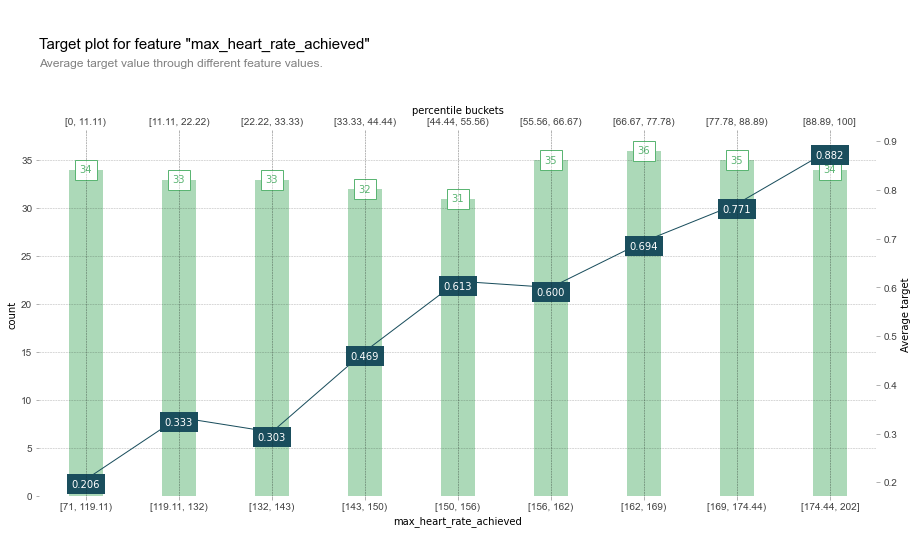

In [28]:
fig,axes,summary_df=info_plots.target_plot(
    df=df,feature='max_heart_rate_achieved',feature_name='max_heart_rate_achieved',target=['target'],show_percentile=True)

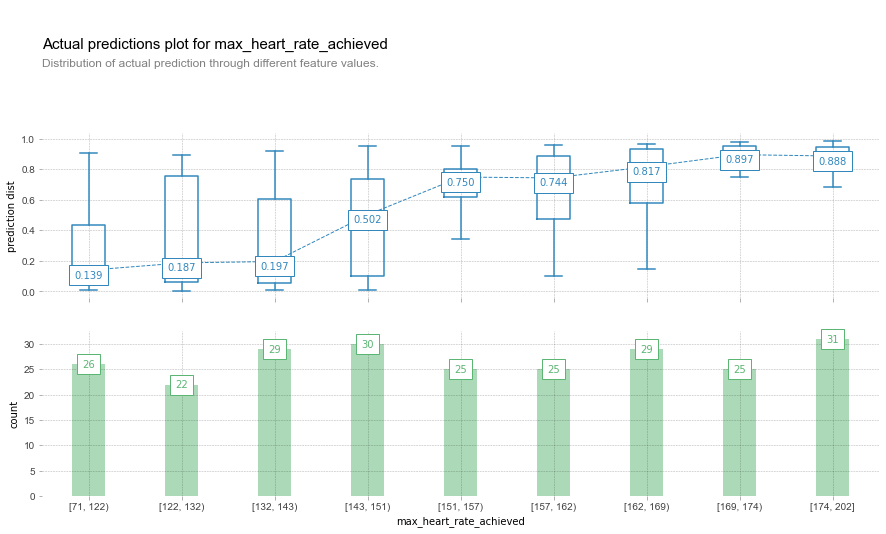

In [30]:
fig,axex,summary_df=info_plots.actual_plot(
    model=model,X=X_train,feature='max_heart_rate_achieved',feature_name='max_heart_rate_achieved',predict_kwds={})

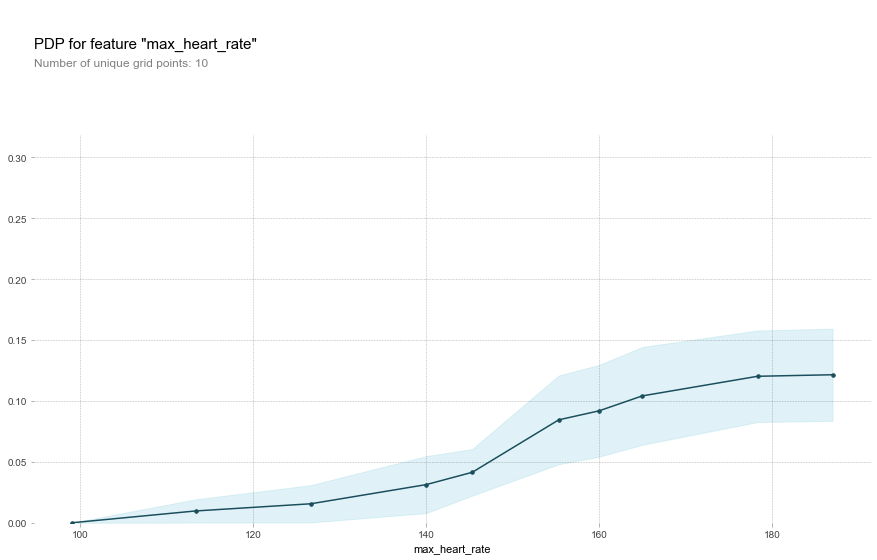

In [35]:
#pdp图重构
pdp_list=pdp.pdp_isolate(
    model=model,dataset=X_test,model_features=base_features,
    feature='max_heart_rate_achieved')
fig,axes=pdp.pdp_plot(pdp_dist,'max_heart_rate')

# 绘制所有特征的pdp图

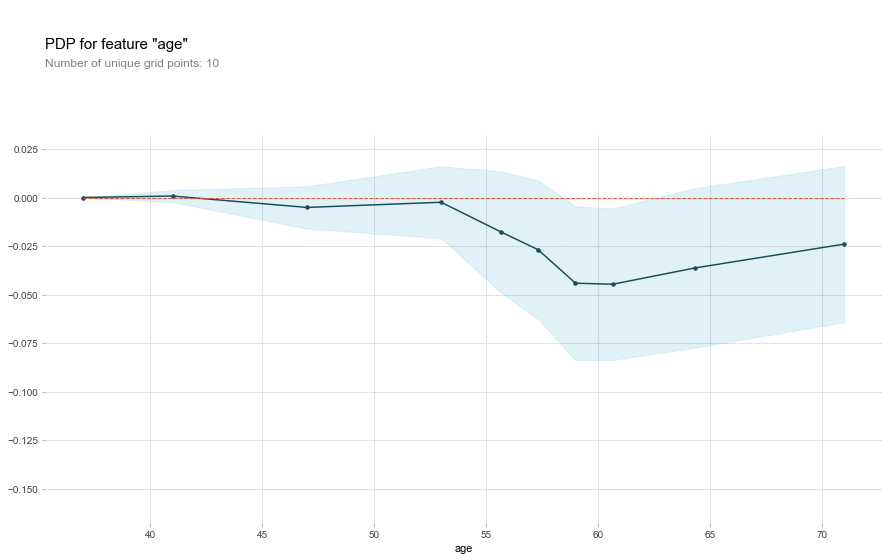

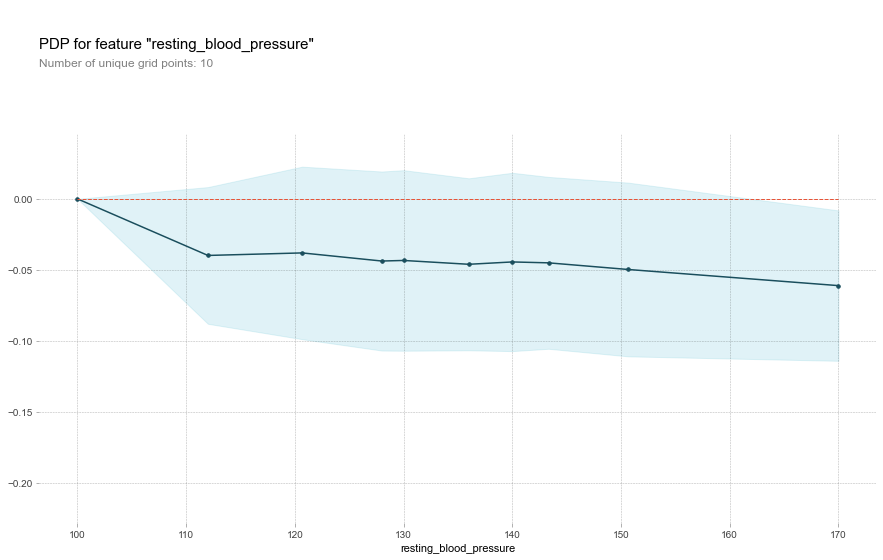

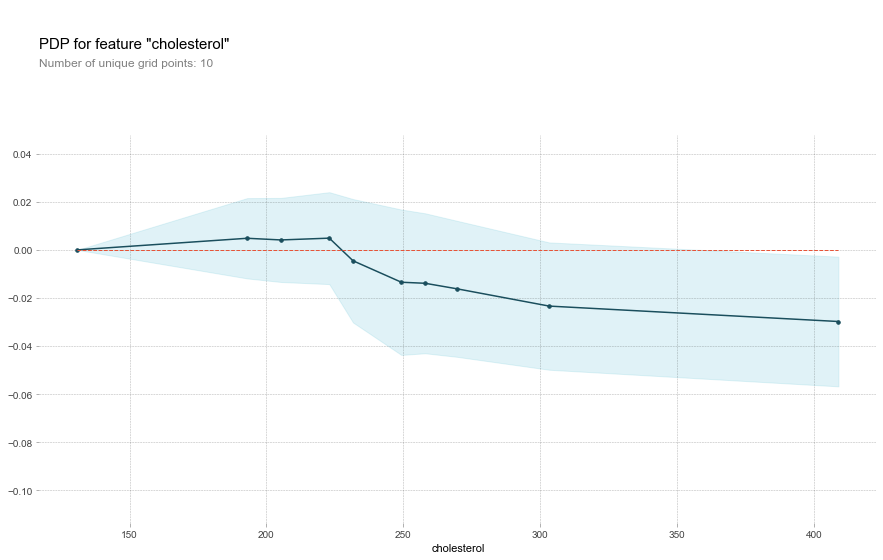

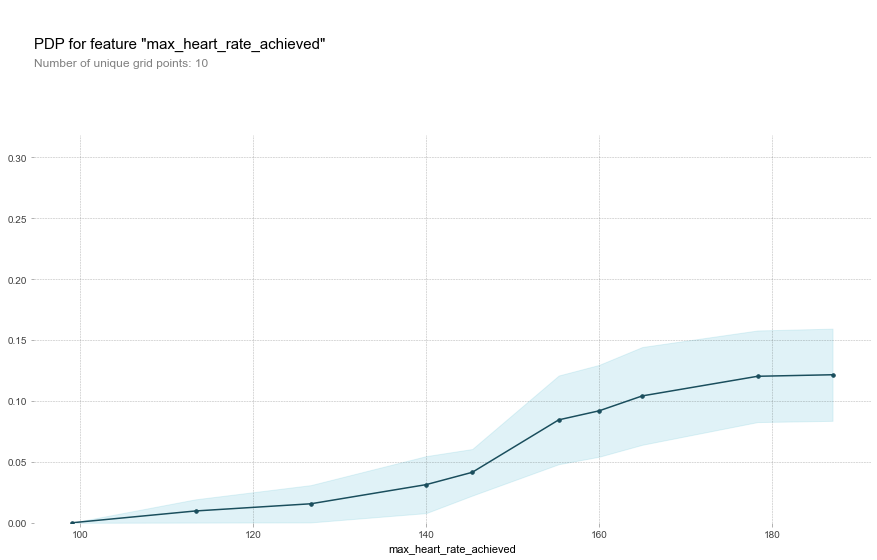

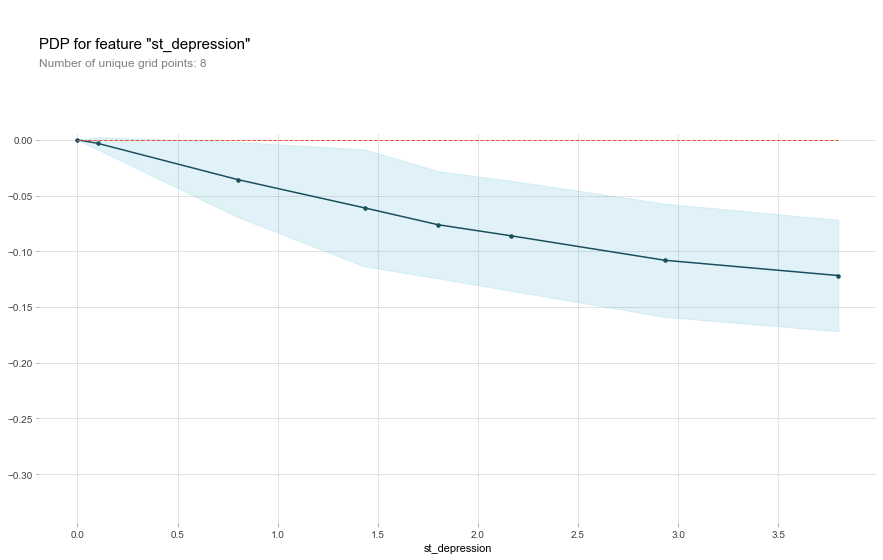

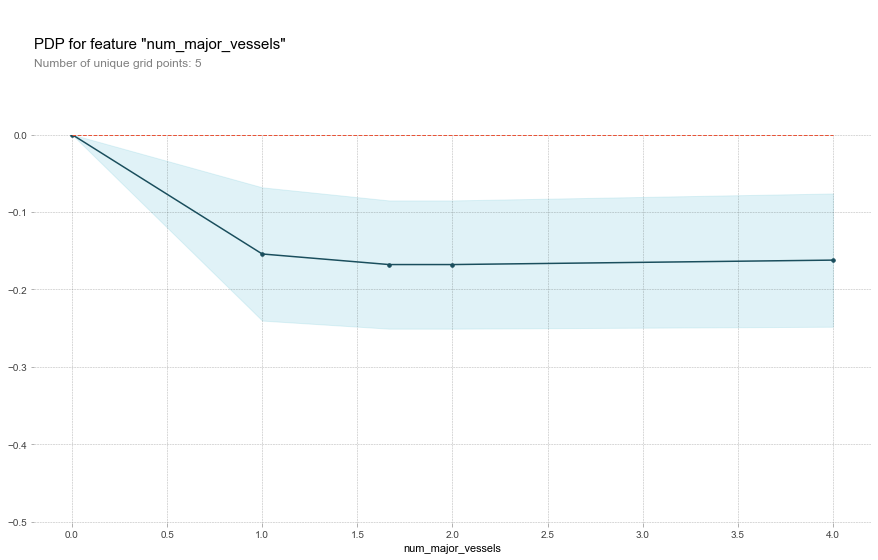

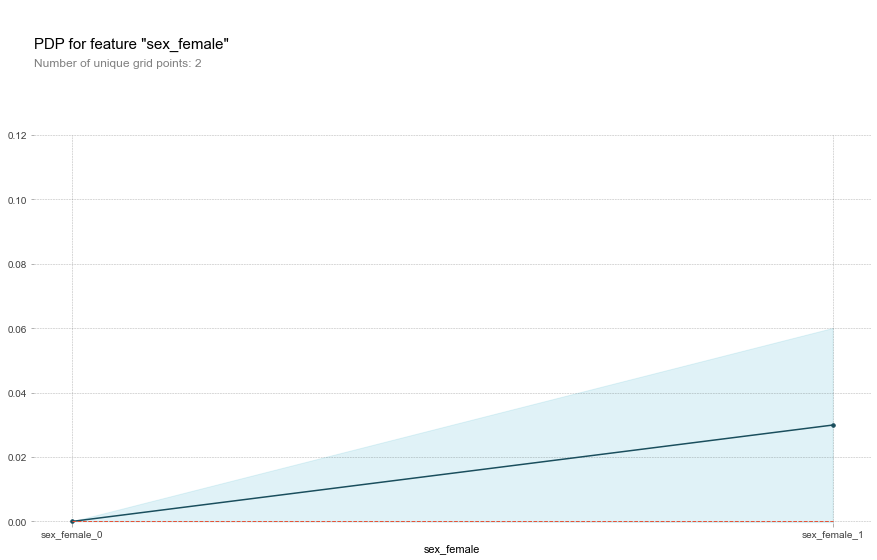

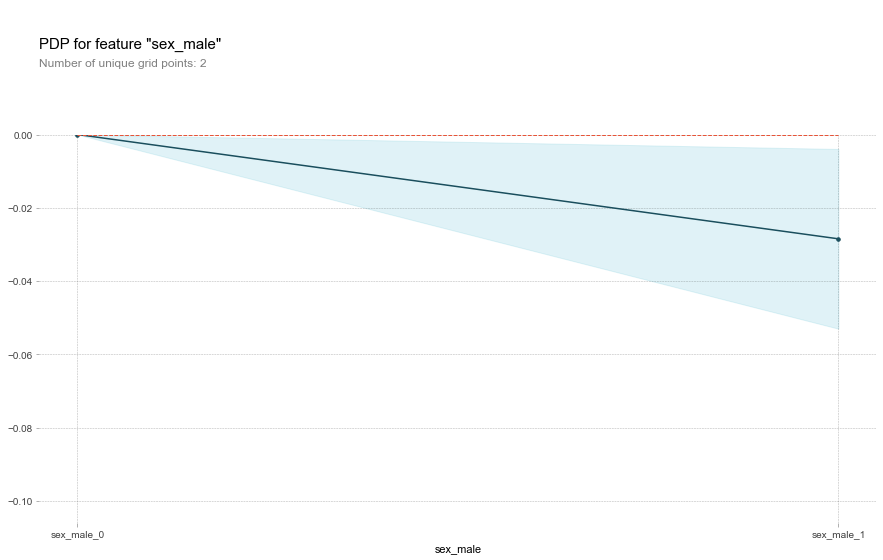

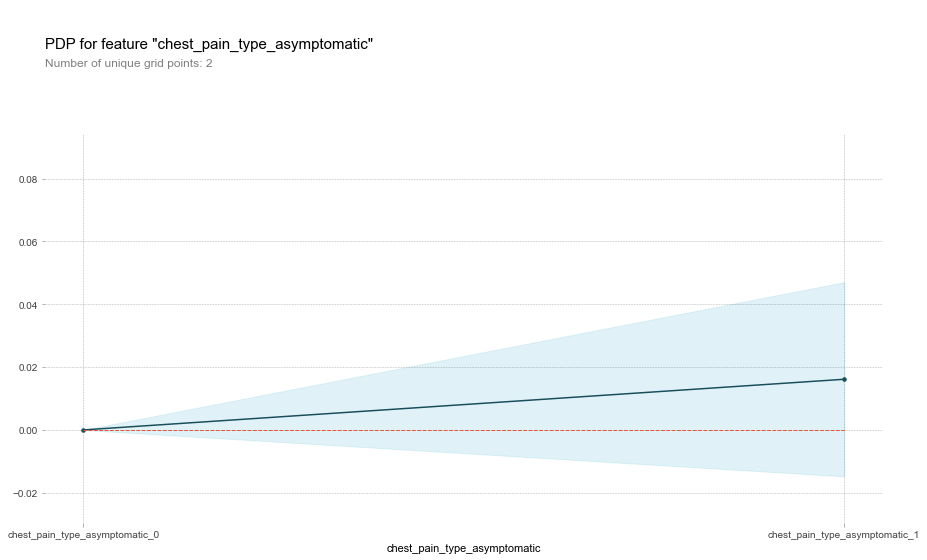

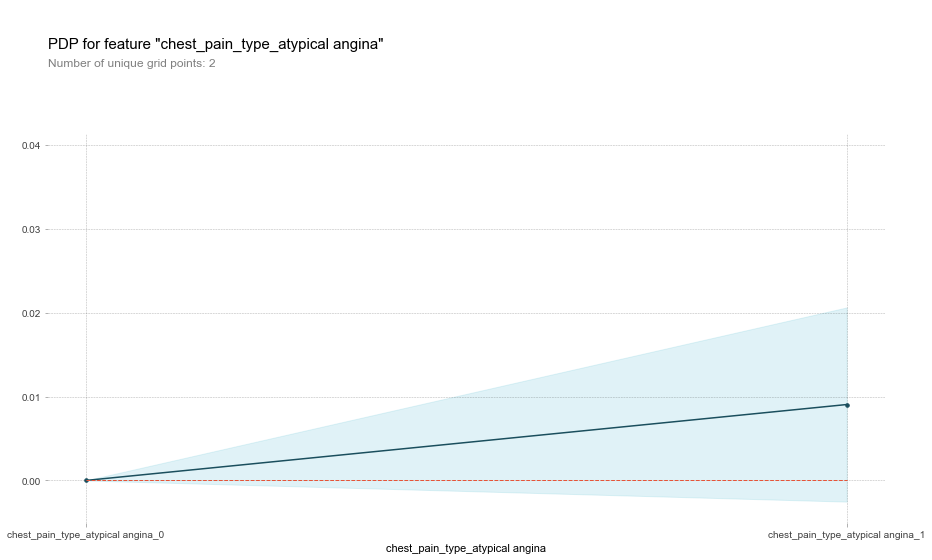

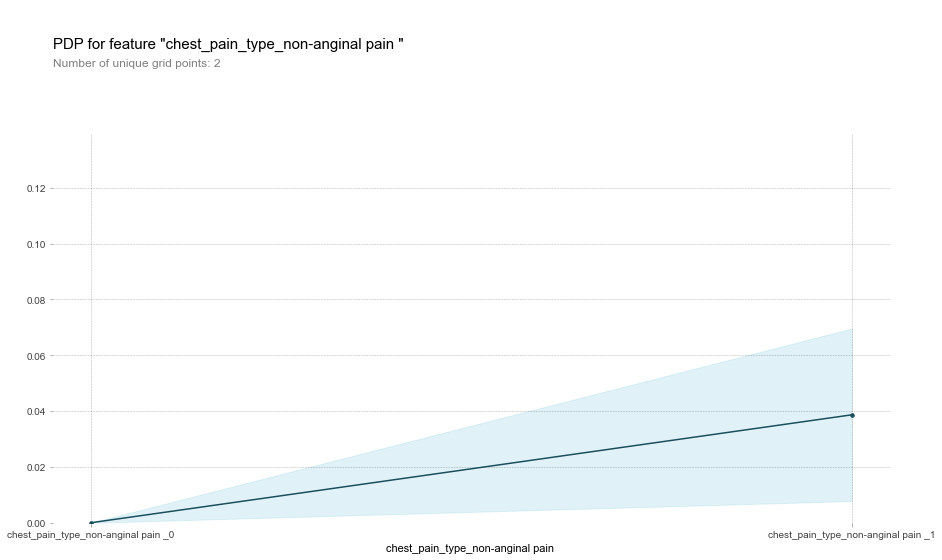

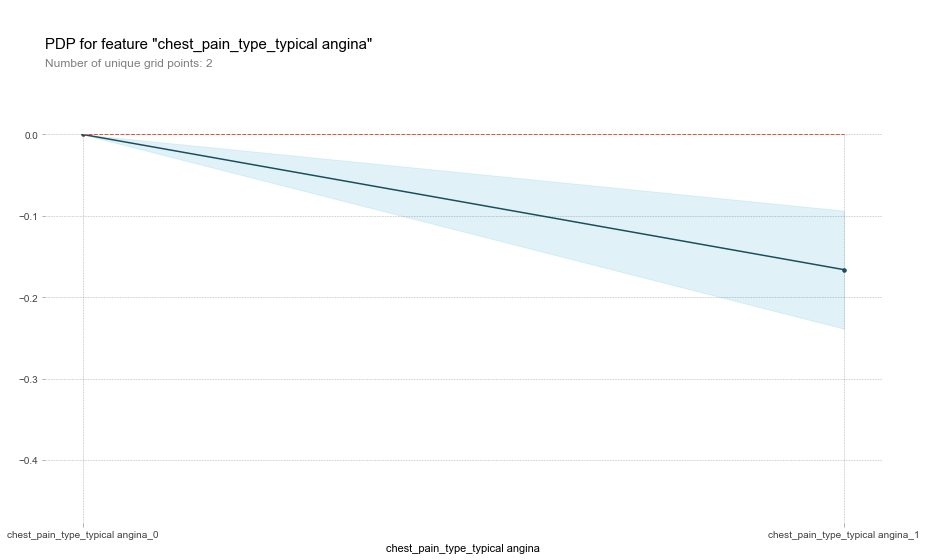

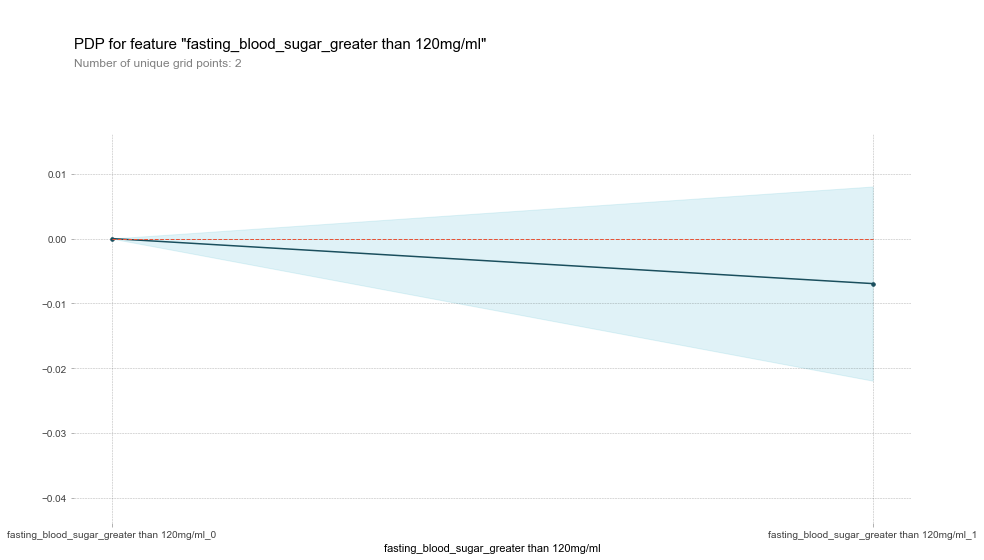

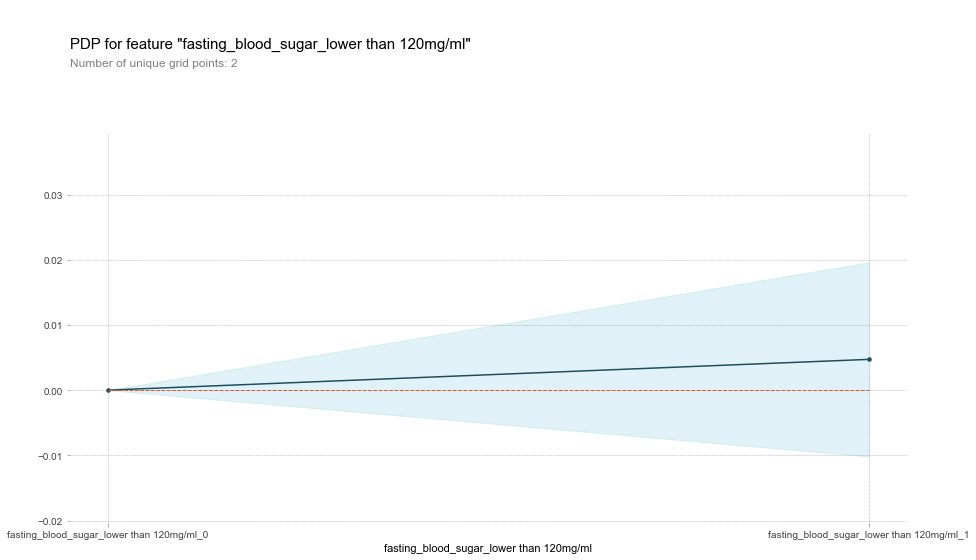

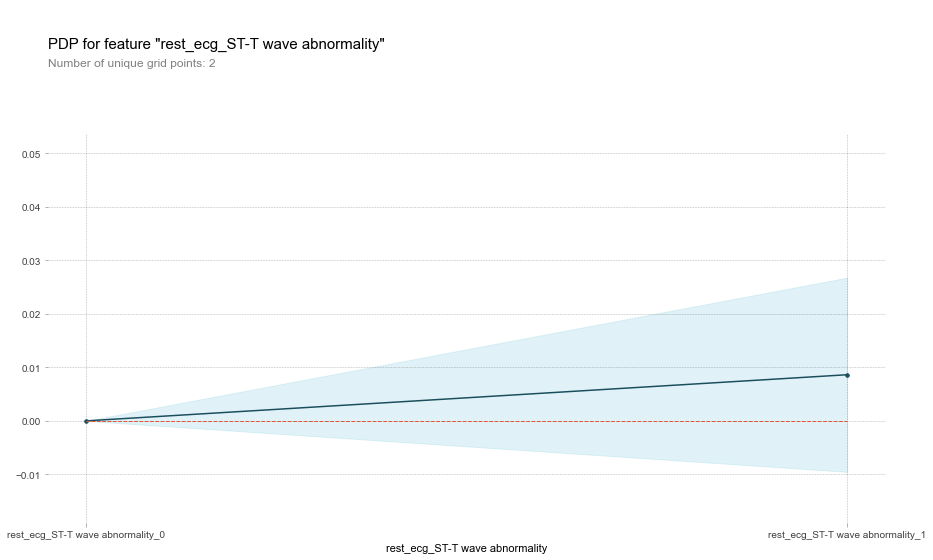

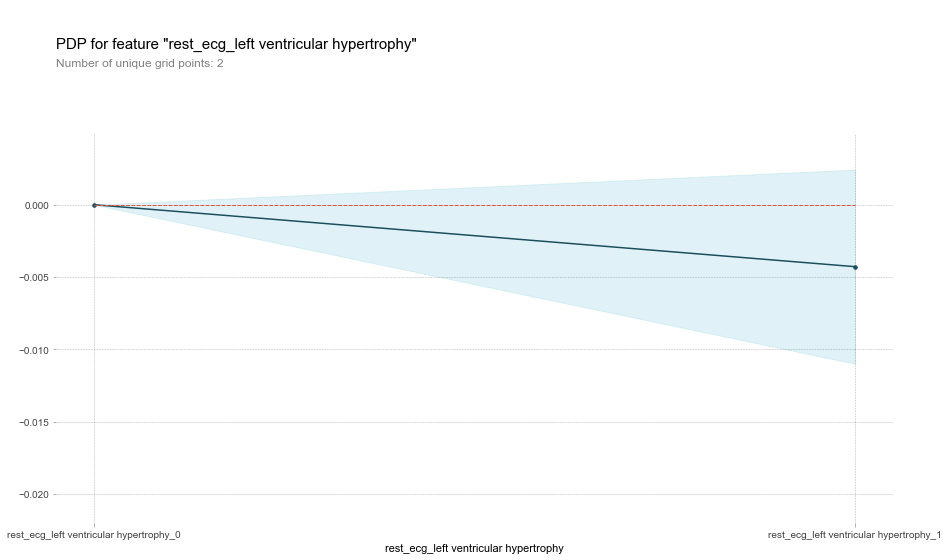

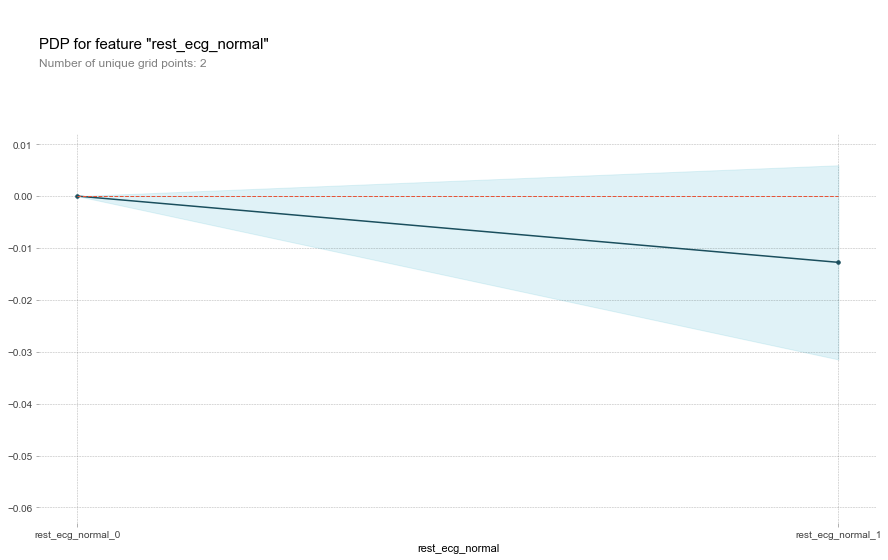

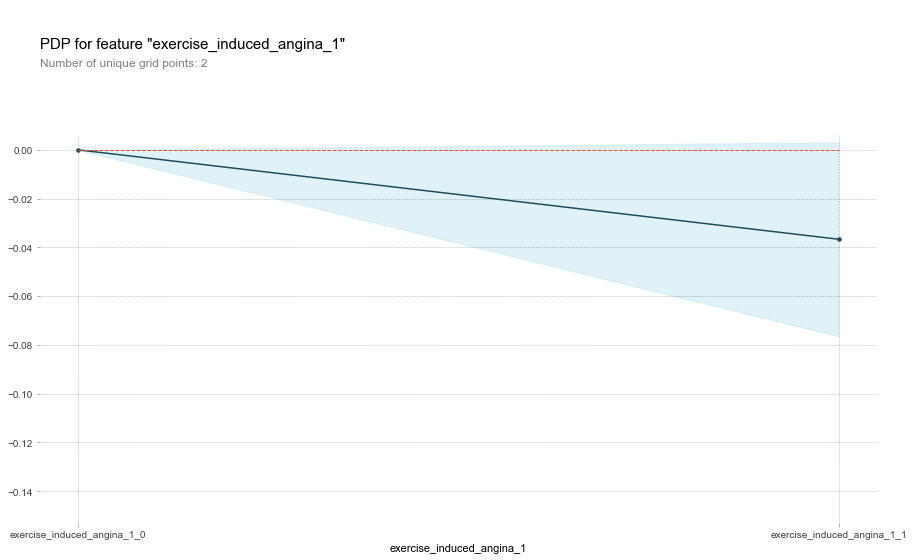

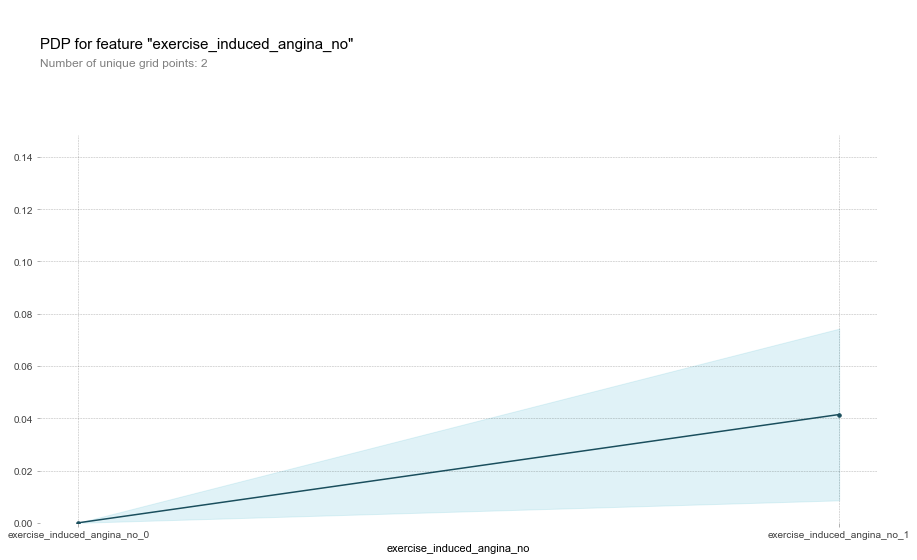

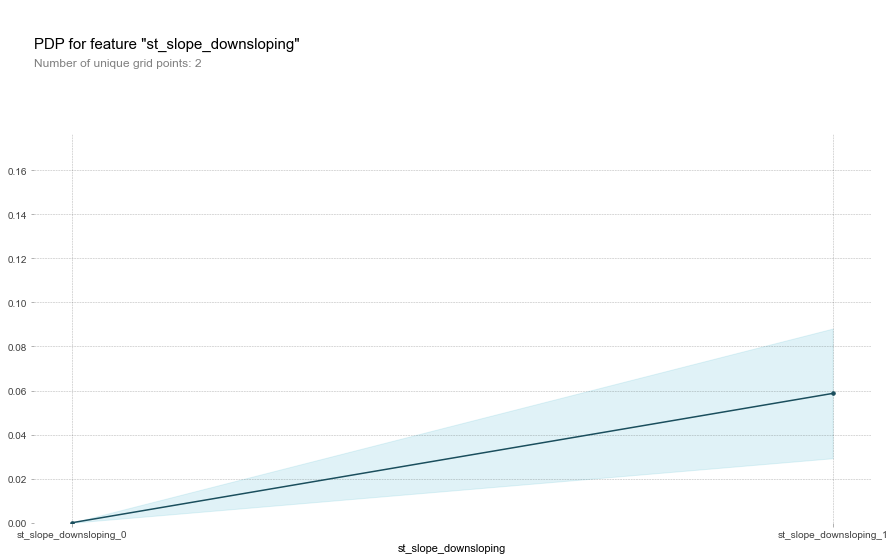

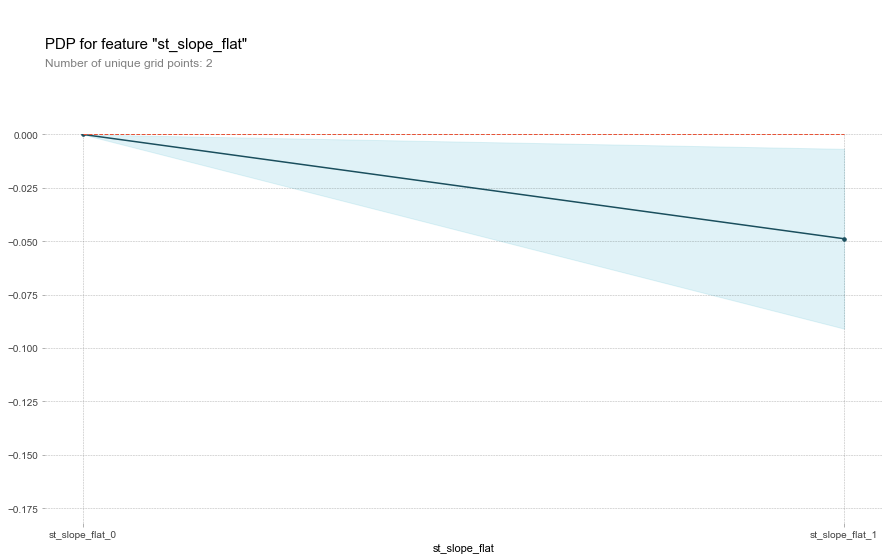

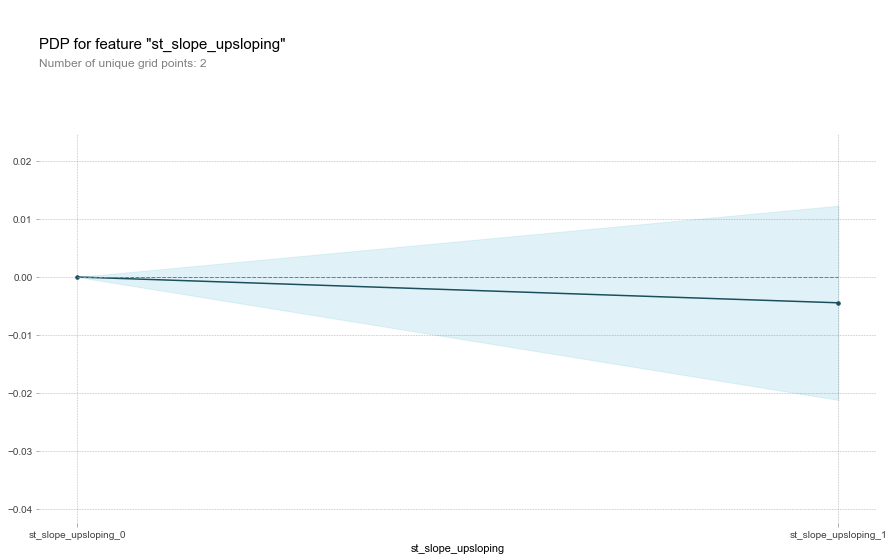

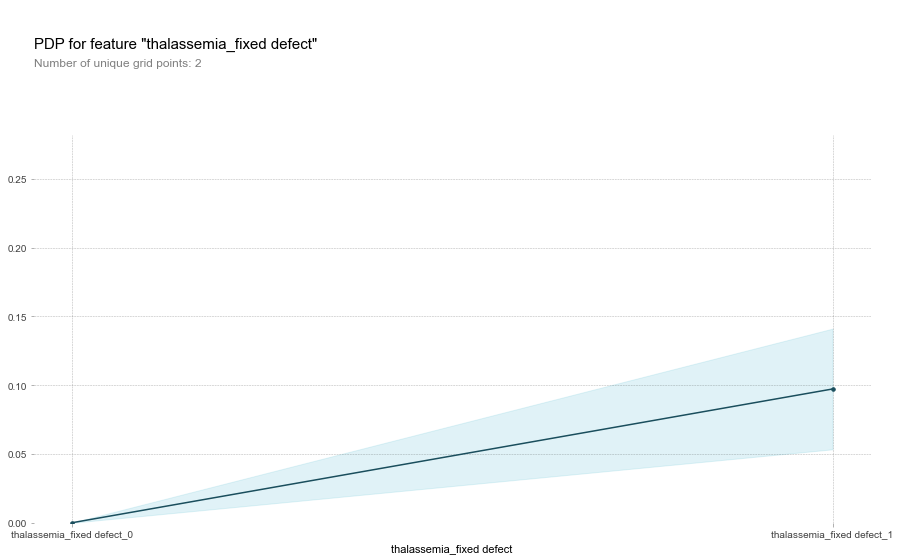

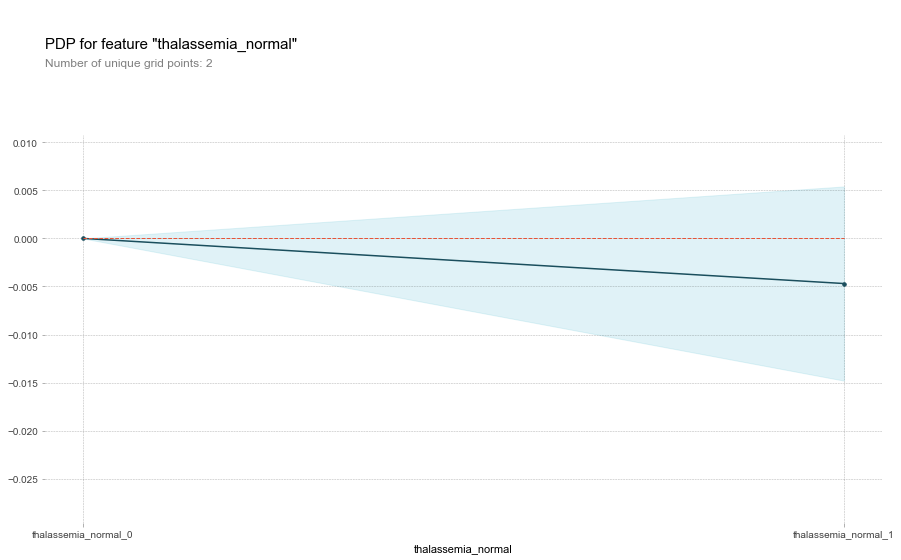

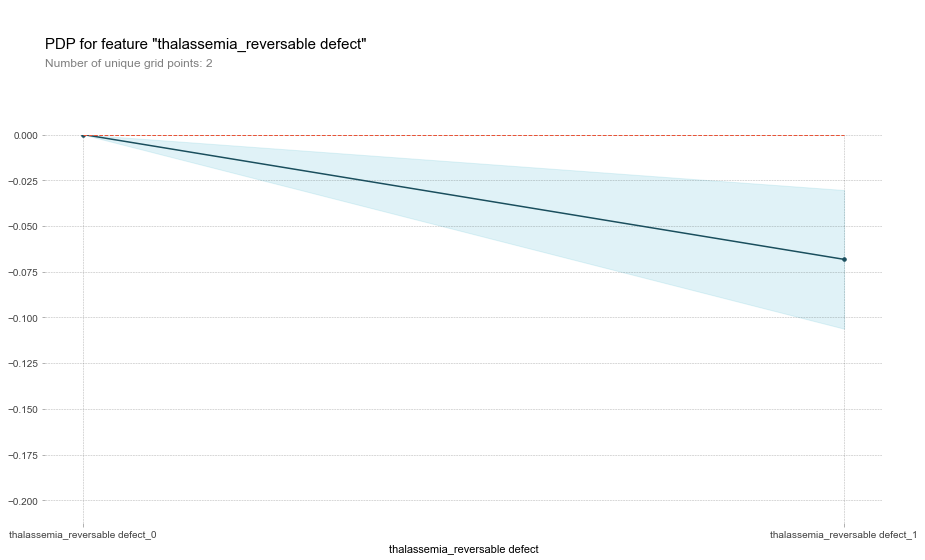

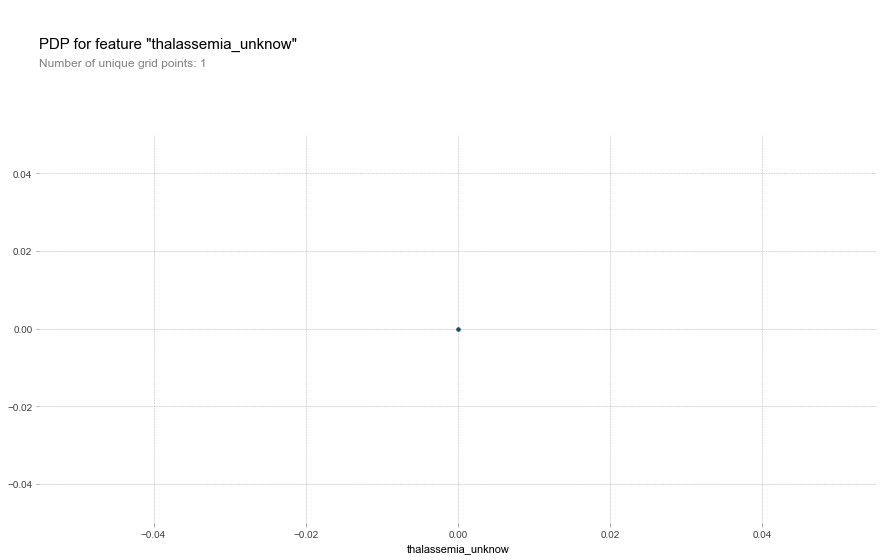

In [39]:
for each in base_features:
    feat_name=each
    pdp_dist=pdp.pdp_isolate(model=model,dataset=X_test,model_features=base_features,feature=feat_name)
    pdp.pdp_plot(pdp_dist,feat_name)
    plt.show()